<a href="https://colab.research.google.com/github/lfmartins/dynamical_systems/blob/main/Numerical_Solutions_of_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we show how to solve differential equations numerically using Python.

The main tool we will use is the function `solve.ivp` in the module `scipy.integrate`.

This function is designed to approximately solve an initial value problem:
$$
\frac{dx}{dt}=f(t, x),\quad x(t_0)=x_0
$$

Here, $x(t)\in\mathbb{R}^n$, that is, we can solve general *systems* of differential equations.

Execute the next cell to load the modules and functions used in this notebook:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# First-order differential equations in one dimension

## First Example

Let's solve the following initial value problem:
$$
\dot{x}=t-x,\quad x(0)=1
$$
Solving a differential equation numerically is a two-step process:

- Create a Python function that represents the right-hand side of the equation.
- Call `solve_ivp()` to compute the solution.

The right-hand side of the equation is the function $f(t,x)$, which can be defined in Python in the following way:

In [ ]:
def diffeq(t, x):
  return t - x

The following is the most basic example of a call to `solve_ivp()`:

In [ ]:
sol = solve_ivp(diffeq, [0.0, 3.0], [1.0])

The arguments for this call are:

- `diffeq`: a Python function that computes the right-hand side of the differential equation.
- `[0.0, 3.0]`: the $t$-range where the solution is computed.
- `[1.0]`: the initial condition. Notice that this has be entered as a list (or vector).

Let's take a look at the solution:

In [ ]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.08707246, 0.89912411, 1.66864823, 2.60007906,
       3.        ])
 t_events: None
        y: array([[1.        , 0.92029381, 0.7131988 , 1.04582535, 1.74879205,
        2.09969339]])
 y_events: None

The first line states that the solution process was successful. A little further down, there are two vectors:

- `t` is the vector of times for which the solution is computed.
- `y` is the vector of solution values (`solve_ivp()` always uses `y` for the dependent variable).

Let's look at these vectors in more detail:

In [ ]:
print(sol.t)
print(sol.y)

[0.         0.08707246 0.89912411 1.66864823 2.60007906 3.        ]
[[1.         0.92029381 0.7131988  1.04582535 1.74879205 2.09969339]]


From this output, we can see, for example that $x(0.92562652)\approx 3.12134095$. Notice that, in this version of the call, we don't get to choose the time values where the solution is evaluated. This can be done in the following call:

In [ ]:
sol = solve_ivp(diffeq, [0.0, 5.0], [1.0], t_eval=np.linspace(0.0, 5.0, 101))
print(sol.message)

The solver successfully reached the end of the integration interval.


The option `t_eval=np.linspace(0.0, 5.0, 101)` tells `solve.ivp()` that we want the solution in 101 equally spaced points in the interval `[0.0, 5.0]`. Notice that, instead of printing the whole solution object, we just print the diagnostic message issued by the function call.

We can now plot the solution:

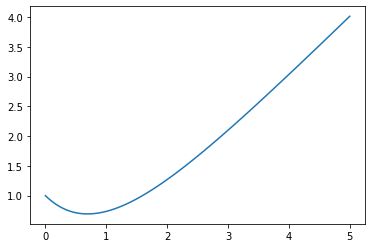

In [ ]:
plt.plot(sol.t, sol.y[0])
None

Notice that in the plot we refer to `sol.y[0]`. This is the first row of the array `sol.y`. When solving a system, each row represents a component of the solution, computed at the times specified by the parameter `t_eval`.

This plot seems a little simple. We can improve it as follows:

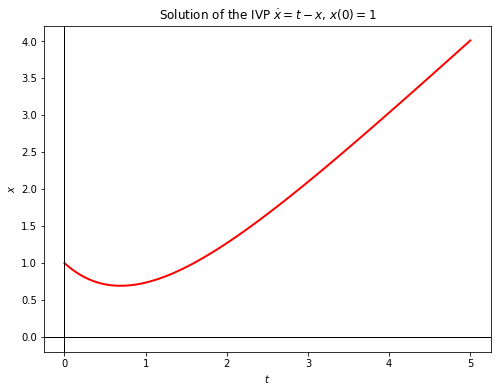

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sol.t, sol.y[0], color='red', lw=2)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title('Solution of the IVP $\\dot{x}=t-x$, $x(0)=1$')
None

The function `solve_ivp()` accepts several parameters, allowing full control of the integration method. By default, `solve_ivp()` uses the method `RK45`, which is a Runge-Kutta method of order 5(4), which uses a fourth-order approximation for error control, and a fifth-order approximation in the integration steps. This method yields a good approximation in most cases.

### Exercises

**1.** Solve the IVP:
$$
\dot{x}=tx,\quad x(1)=2.
$$
Plot the solution in the interval $[1,5]$. Then, solve the IVP by the method of separation of variables compare your exact solution with the numerical solution. Finally, produce a plot of the solution.

**2.** Solve the IVP:
$$
\dot{N}=0.3N\left(1-\frac{N}{15.35}\right)
$$
Before solving the IVP numerically, determine $\lim_{t\to\infty}x(t)$ analytically. Then use the numerical solution to verify the limit. Also generate a plot of the solution.

**3.** Solve the IVP:
$$
\dot{x}=\sqrt{1+x^4},\quad x(0)=2
$$
and generate a graph of the solution. Describe the solution qualitatively. Can you prove your observations?

**4.** Solve the following IVP numerically in the interval $[0,1]$
$$
\dot{x}=x,\quad x(0)=1.
$$
We know that the exact solution of the IVP is $x(t)=e^t$. Use this to obtain an approximation for $e$ from the numerical method. How good is the approximation?

## Equations with Parameters

In many cases, we want to solve equations that contain parameters. One example is the logistic model of population growth, represented by the differential equation:
$$
\dot{N}=rN\left(1-\frac{N}{K}\right)
$$
Here, $r$ and $K$ are parameters modeling, respectively, the growth rate of small populations and the carrying capacity.

We start, as before, by defining the function representing the ODE, including the parameters $r$ and $K$:

In [ ]:
def logistic_model(t, N, r, K):
  return r * N * (1 - N / K)

Let's now say we want to find the solution of the ODE with parameters $r=0.3$ and $K=15.35$ for the initial condition $N(0)=5.7$. We can do that with the following code:

In [ ]:
sol = solve_ivp(logistic_model, [0, 20], [5.7], t_eval=np.linspace(0, 20, 101), args=[0.3, 13.35])
print(sol.message)

The solver successfully reached the end of the integration interval.


Let's plot the solution:

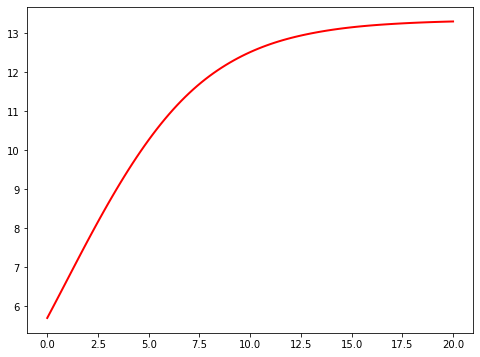

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sol.t, sol.y[0], color='red', lw=2)
None

Let's say we want to compare the growth of this population with one for which $r=0.1$, but has the same carrying capacity. We do this in the next computation cells:

In [ ]:
sol1 = solve_ivp(logistic_model, [0, 20], [5.7], t_eval=np.linspace(0, 20, 101), args=[0.1, 13.35])
print(sol.message)

The solver successfully reached the end of the integration interval.


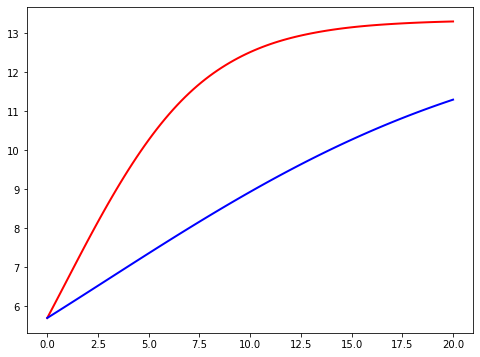

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sol.t, sol.y[0], color='red', lw=2)
plt.plot(sol1.t, sol1.y[0], color='blue', lw=2)
None

### Exercises

**5**. What is the limit of the solutions in the example above as $t\to\infty$? Are the limits of the two curves the same? Plot a graph in a wider range to verify your conjecture.

**6.** Recall the Gompertz model for tumor growth:
$$
\dot{N}=-a\log(bN).
$$
In class, we deduced the following:

- The limit tumor size is $1/b$.
- The tumor grows the fastest when it has size $e^{-1}/b$
- The largest rate of growth is $a$.

Use numerical solutions to verify these statements, using the following protocol:

- Choose three different examples for the set of parameters $\{a,b\}$.
- For each parameter set, solve the equation numerically for two different initial conditions.
- Check if the three statements above are correct in each case. Demonstrate your conclusions both graphically and numerically.